In [25]:
from typing import List # code different from book so check through mentors of linkedin
import math

Vector = List[float]

def dot(v: Vector, w: Vector) -> float:
    assert len(v) == len(w), "vectors must be the same length"
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

def de_mean(xs: List[float]) -> List[float]:
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    assert len(xs) >= 2, "variance requires at least two elements"
    return dot(de_mean(xs), de_mean(xs)) / (len(xs) - 1)

def standard_deviation(xs: List[float]) -> float:
    return math.sqrt(variance(xs))

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have the same number of elements"
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

def correlation(xs: List[float], ys: List[float]) -> float:
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / (stdev_x * stdev_y)
    else:
        return 0  # avoid dividing by zero

xs = [1, 2, 3, 4, 5]
ys = [2, 4, 6, 8, 10]   # perfectly correlated

print(correlation(xs, ys))  # Output: 1.0 (perfect correlation)


0.9999999999999998


Correlation without outlier: 1.0


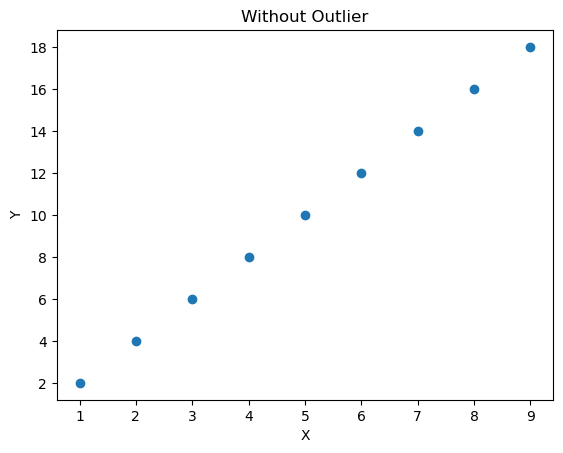

In [29]:
# correlation with oultier and without outlier
import matplotlib.pyplot as plt

xs = [1, 2, 3, 4, 5, 6, 7, 8, 9]
ys = [2, 4, 6, 8, 10, 12, 14, 16, 18]  # perfectly linear

def correlation(xs, ys):
    import math
    def mean(v): return sum(v) / len(v)
    def de_mean(v): return [x - mean(v) for x in v]
    def dot(v, w): return sum(v_i * w_i for v_i, w_i in zip(v, w))
    def variance(v): return dot(de_mean(v), de_mean(v)) / (len(v) - 1)
    def std(v): return math.sqrt(variance(v))
    cov = dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)
    return cov / (std(xs) * std(ys))

print("Correlation without outlier:", correlation(xs, ys))

plt.scatter(xs, ys)
plt.title("Without Outlier")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


Correlation with outlier: 0.6660929560879215


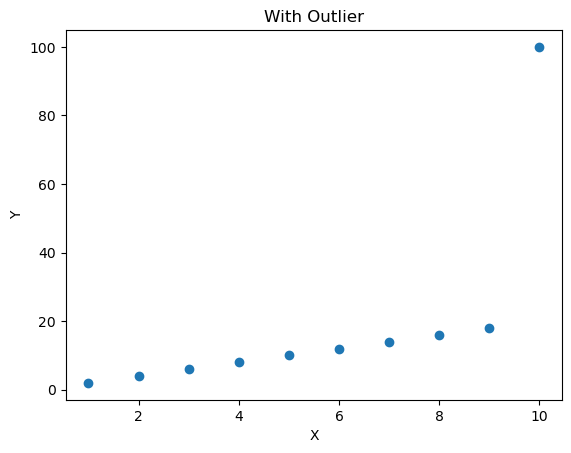

In [31]:
# Add one outlier point
xs_with_outlier = xs + [10]
ys_with_outlier = ys + [100]  # huge outlier

print("Correlation with outlier:", correlation(xs_with_outlier, ys_with_outlier))

plt.scatter(xs_with_outlier, ys_with_outlier)
plt.title("With Outlier")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
